In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import svm

In [151]:
df = pd.read_csv("/content/drive/MyDrive/car.csv",sep=",",header=None,names=['buying','maint','doors','person','lug_boot','safety','class'])
df

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [152]:
df.isnull().sum()

buying      0
maint       0
doors       0
person      0
lug_boot    0
safety      0
class       0
dtype: int64

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   person    1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [154]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [155]:
df.describe()

,buying,maint,doors,person,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [156]:
df['doors'] = df['doors'].map({'2':2,'3':3,'4':4,'5more':5}) #Here 5 means 5 or more
df['person'] = df['person'].map({'2':2,'4':4,'more':5}) #Here 5 means 5 or more

In [157]:
obj_en = df.select_dtypes("object").columns
def encode(col):
  en_map = {k:v for v,k in enumerate(df[col].unique())}
  df[col] = df[col].map(en_map)
  return en_map

In [158]:
ls_dc = []
for i in obj_en:
  ls_dc.append(encode(i))
ls_dc

[{'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
 {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
 {'small': 0, 'med': 1, 'big': 2},
 {'low': 0, 'med': 1, 'high': 2},
 {'unacc': 0, 'acc': 1, 'vgood': 2, 'good': 3}]

In [159]:
ls_dc = ls_dc[0:2] + [{'2':2,'3':3,'4':4,'5more':5}, {'2':2,'4':4,'more':5}] +ls_dc[2:]
ls_dc

[{'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
 {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
 {'2': 2, '3': 3, '4': 4, '5more': 5},
 {'2': 2, '4': 4, 'more': 5},
 {'small': 0, 'med': 1, 'big': 2},
 {'low': 0, 'med': 1, 'high': 2},
 {'unacc': 0, 'acc': 1, 'vgood': 2, 'good': 3}]

In [160]:
df

,buying,maint,doors,person,lug_boot,safety,class
0,0,0,2,2,0,0,0
1,0,0,2,2,0,1,0
2,0,0,2,2,0,2,0
3,0,0,2,2,1,0,0
4,0,0,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,3,3,5,5,1,1,3
1724,3,3,5,5,1,2,2
1725,3,3,5,5,2,0,0
1726,3,3,5,5,2,1,3


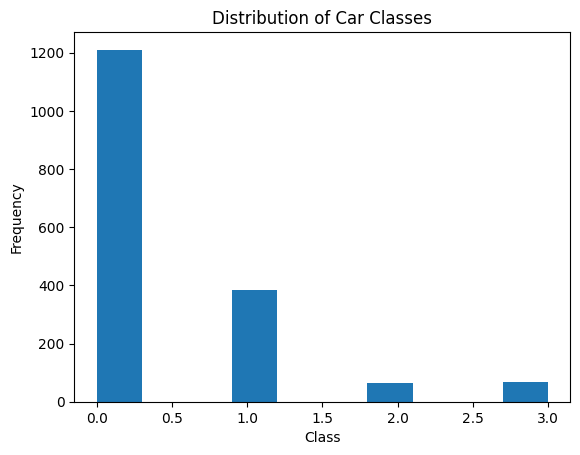

In [161]:
plt.hist(df["class"])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Distribution of Car Classes")
plt.show()

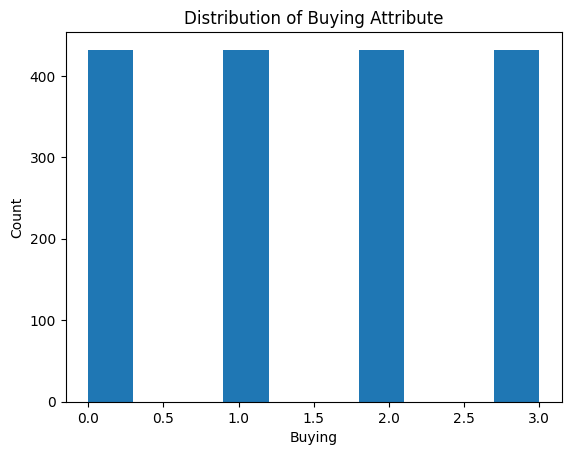

In [162]:
# Plot a histogram of the buying attribute
plt.hist(df['buying'])
plt.xlabel('Buying')
plt.ylabel('Count')
plt.title('Distribution of Buying Attribute')
plt.show()

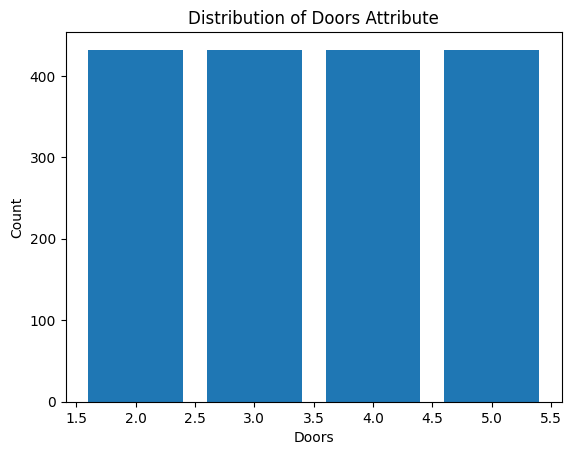

In [163]:
# Plot a bar plot of the doors attribute
plt.bar(df['doors'].unique(), df['doors'].value_counts())
plt.xlabel('Doors')
plt.ylabel('Count')
plt.title('Distribution of Doors Attribute')
plt.show()

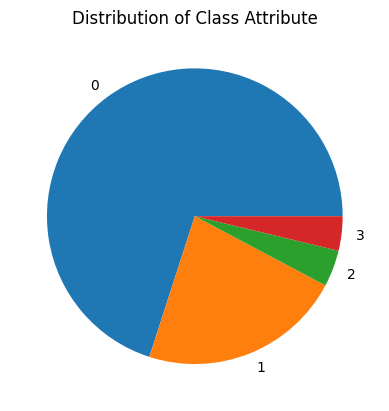

In [164]:
# Plot a pie chart of the class attribute
plt.pie(df['class'].value_counts(), labels=df['class'].unique())
plt.title('Distribution of Class Attribute')
plt.show()

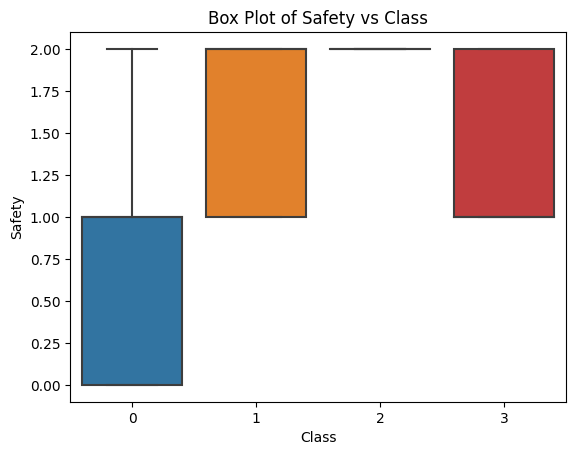

In [165]:
# Box plot of 'safety' and 'class' attributes
sns.boxplot(x='class', y='safety', data=df)
plt.xlabel('Class')
plt.ylabel('Safety')
plt.title('Box Plot of Safety vs Class')
plt.show()

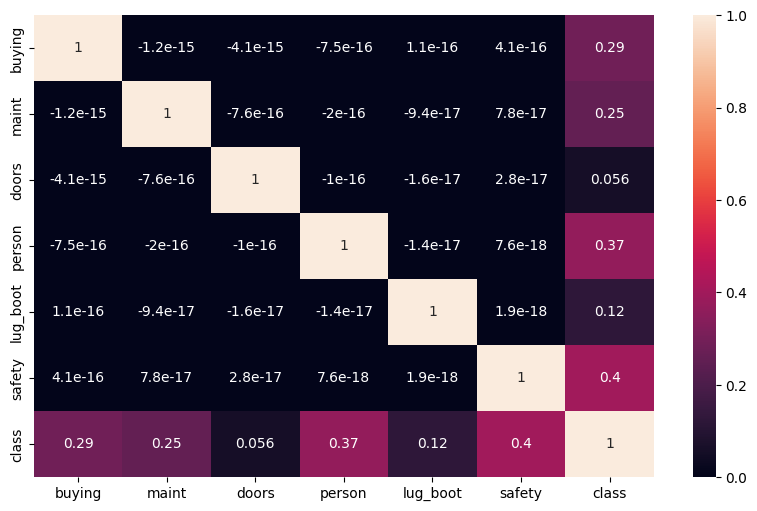

In [166]:
corr_df = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(data = corr_df, annot = True)
plt.show()

In [167]:
X = df.drop(['class'], axis=1)
y = df['class']

In [168]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [169]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [170]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
X_train = sc1.fit_transform(X_train)
X_test = sc2.fit_transform(X_test)

In [171]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_nb = gnb.predict(X_test)

In [172]:
accuracy = accuracy_score(y_test,y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average="macro")
recall = recall_score(y_test, y_pred_nb, average="macro")

print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

Accuracy: 80.73555166374781
Precision: 46.02881396461024
Recall: 47.14179017046453


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
from sklearn.metrics import ConfusionMatrixDisplay
df = pd.DataFrame(confusion_matrix(y_pred_nb,y_test))
df

,0,1,2,3
0,371,39,0,0
1,25,84,21,14
2,0,0,0,0
3,1,6,4,6


In [174]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(max_iter = 100,random_state = 0)
clf_lr.fit(X_train,y_train)
y_pred_lr = clf_lr.predict(X_test)

In [175]:
accuracy1 = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average="macro")
recall = recall_score(y_test, y_pred_lr, average="macro")

print(f"Accuracy: {accuracy1*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

Accuracy: 84.41330998248687
Precision: 74.09416464294513
Recall: 67.4664147774979


In [176]:
df = pd.DataFrame(confusion_matrix(y_pred_lr,y_test))
df

,0,1,2,3
0,370,40,0,0
1,22,86,5,13
2,2,1,20,1
3,3,2,0,6


In [177]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

In [178]:
accuracy2 = accuracy_score(y_test, y_pred_gini)
precision = precision_score(y_test, y_pred_gini, average="macro")
recall = recall_score(y_test, y_pred_gini, average="macro")

print(f"Accuracy: {accuracy2*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

Accuracy: 80.21015761821366
Precision: 35.86385836385836
Recall: 38.3916193154082


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.3333333333333333, 0.875, 'x[5] <= -0.614\ngini = 0.455\nsamples = 1157\nvalue = [813, 255, 40, 49]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [386, 0, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= -0.551\ngini = 0.577\nsamples = 771\nvalue = [427, 255, 40, 49]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [246, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 0.0\ngini = 0.631\nsamples = 525\nvalue = [181, 255, 40, 49]'),
 Text(0.5, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [147, 124, 0, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [34, 131, 40, 49]')]

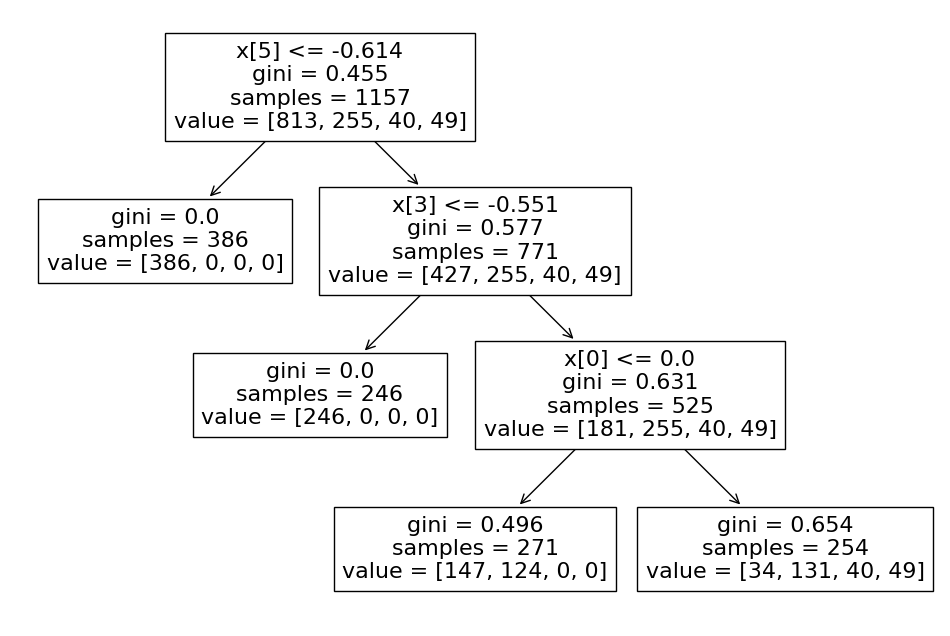

In [179]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [180]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[385  12   0   0]
 [ 56  73   0   0]
 [  0  25   0   0]
 [  0  20   0   0]]


In [181]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

In [182]:
accuracy3 = accuracy_score(y_test, y_pred_en)
precision = precision_score(y_test, y_pred_en, average="macro")
recall = recall_score(y_test, y_pred_en, average="macro")

print(f"Accuracy: {accuracy3*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

Accuracy: 80.21015761821366
Precision: 35.86385836385836
Recall: 38.3916193154082


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.3333333333333333, 0.875, 'x[5] <= -0.614\nentropy = 1.2\nsamples = 1157\nvalue = [813, 255, 40, 49]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 386\nvalue = [386, 0, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= -0.551\nentropy = 1.474\nsamples = 771\nvalue = [427, 255, 40, 49]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 246\nvalue = [246, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 0.0\nentropy = 1.638\nsamples = 525\nvalue = [181, 255, 40, 49]'),
 Text(0.5, 0.125, 'entropy = 0.995\nsamples = 271\nvalue = [147, 124, 0, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.759\nsamples = 254\nvalue = [34, 131, 40, 49]')]

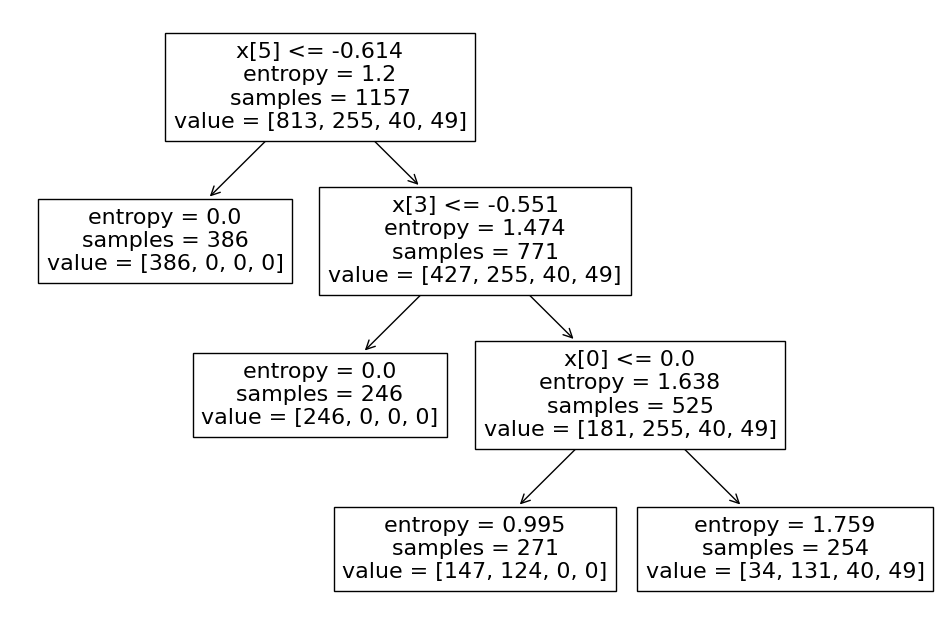

In [183]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

In [184]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[385  12   0   0]
 [ 56  73   0   0]
 [  0  25   0   0]
 [  0  20   0   0]]


In [185]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred_rfc = model4.predict(X_test)

In [186]:
accuracy4 = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc, average="macro")
recall = recall_score(y_test, y_pred_rfc, average="macro")

print(f"Accuracy: {accuracy4*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

Accuracy: 97.02276707530648
Precision: 88.85811169669486
Recall: 92.30524476207212


In [187]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rfc)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[396   1   0   0]
 [  2 118   2   7]
 [  0   3  22   0]
 [  0   1   1  18]]


In [188]:
model5 = SVC()
model5.fit(X_train, y_train)
y_pred_svc = model5.predict(X_test)

In [189]:
accuracy5 = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc, average="macro")
recall = recall_score(y_test, y_pred_svc, average="macro")

print(f"Accuracy: {accuracy5*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

Accuracy: 96.49737302977232
Precision: 90.74521795091513
Recall: 91.17930017768924


In [190]:
cm = confusion_matrix(y_test, y_pred_svc)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[394   3   0   0]
 [  7 118   0   4]
 [  0   3  21   1]
 [  0   0   2  18]]


In [192]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree(using gini)','Decision Tree(using entropy)', 'Random Forest Classifier', 'Support Vector Classifier'],
    'Model Score': [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]})
models

,Model,Model Score
0,Logistic Regression,0.844133
1,Decision Tree(using gini),0.802102
2,Decision Tree(using entropy),0.802102
3,Random Forest Classifier,0.970228
4,Support Vector Classifier,0.964974
